In [2]:
from pyHalo.preset_models import CDM, WDM
from pyHalo.plotting_routines import plot_subhalo_mass_functon, plot_subhalo_bound_mass, plot_concentration_mass_relation, plot_subhalo_spatial_distribution
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

### Spatial distribution of subhalos

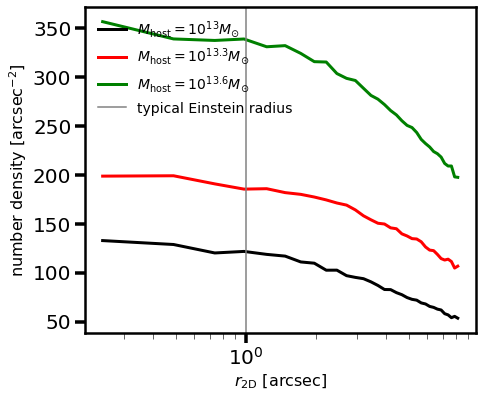

In [25]:
cone_opening_angle_arcsec = 16
cdm_spatial_distribution1 = CDM(0.5, 1.5, sigma_sub=0.5, LOS_normalization=0.0, 
                               cone_opening_angle_arcsec=cone_opening_angle_arcsec,
                               log_m_host=13.0)
cdm_spatial_distribution2 = CDM(0.5, 1.5, sigma_sub=0.5, LOS_normalization=0.0, 
                               cone_opening_angle_arcsec=cone_opening_angle_arcsec, 
                               log_m_host=13.3)
cdm_spatial_distribution3 = CDM(0.5, 1.5, sigma_sub=0.5, LOS_normalization=0.0, 
                               cone_opening_angle_arcsec=cone_opening_angle_arcsec, 
                               log_m_host=13.6)

# here you can optionally keep the total number of halos fixed to isolate differences in the spatial distribution
# cdm_spatial_distribution2.halos = cdm_spatial_distribution2.halos[0:len(cdm_spatial_distribution1.halos)]
# cdm_spatial_distribution3.halos = cdm_spatial_distribution3.halos[0:len(cdm_spatial_distribution1.halos)]

fig = plt.figure(1)
fig.set_size_inches(7,6)
ax = plt.subplot(111)
kwargs_plot={'lw':3, 'label': r'$M_{\rm{host}} = 10^{13} M_{\odot}$'}
plot_subhalo_spatial_distribution(cdm_spatial_distribution1, 
                                  max_range_arcsec=cone_opening_angle_arcsec/2, ax=ax, 
                                  nbins=50, color='k', kwargs_plot=kwargs_plot)
kwargs_plot={'lw':3, 'label': r'$M_{\rm{host}} = 10^{13.3} M_{\odot}$'}
plot_subhalo_spatial_distribution(cdm_spatial_distribution2, 
                                  max_range_arcsec=cone_opening_angle_arcsec/2, 
                                  ax=ax, nbins=50, color='r', kwargs_plot=kwargs_plot)
kwargs_plot={'lw':3, 'label': r'$M_{\rm{host}} = 10^{13.6} M_{\odot}$'}
plot_subhalo_spatial_distribution(cdm_spatial_distribution3, 
                                  max_range_arcsec=cone_opening_angle_arcsec/2, 
                                  ax=ax, nbins=50, color='g', kwargs_plot=kwargs_plot)

ax.set_xscale('log')
#ax.set_ylim(50, 150)
#ax.set_yscale('log')
plt.axvline(1.0, color='0.5', label='typical Einstein radius')
plt.legend(fontsize=14, frameon=False)

### Subhalo mass function (bound and infall)

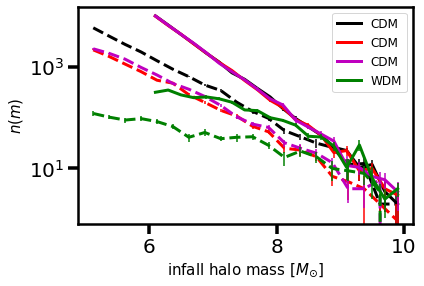

In [14]:
sigma_sub = 0.2
cdm = CDM(0.5, 1.5, sigma_sub=sigma_sub, LOS_normalization=0.0)

kwargs_truncation_model_subhalos = {'median_rt_over_rs':5.0, 'c_power': 3.0}
cdm_truncation_v2 = CDM(0.5, 1.5, sigma_sub=sigma_sub, LOS_normalization=0.0, 
                       truncation_model_subhalos='TRUNCATION_MEAN_DENSITY',
                       kwargs_truncation_model_subhalos=kwargs_truncation_model_subhalos)

kwargs_truncation_model_subhalos = {'median_rt_over_rs':5.0, 'c_power': 6.0}
cdm_truncation_v3 = CDM(0.5, 1.5, sigma_sub=sigma_sub, LOS_normalization=0.0, 
                       truncation_model_subhalos='TRUNCATION_MEAN_DENSITY',
                       kwargs_truncation_model_subhalos=kwargs_truncation_model_subhalos)

kwargs_truncation_model_subhalos = {'median_rt_over_rs':5.0, 'c_power': 3.0}
wdm = WDM(0.5, 1.5, log_mc=7.5, sigma_sub=sigma_sub, LOS_normalization=0.0, 
                       truncation_model_subhalos='TRUNCATION_MEAN_DENSITY',
                       kwargs_truncation_model_subhalos=kwargs_truncation_model_subhalos)

kwargs_truncation_model_subhalos = {'median_rt_over_rs':5.0, 'c_power': 6.0}
wdm_v2 = WDM(0.5, 1.5, log_mc=7.5, sigma_sub=sigma_sub, LOS_normalization=0.0, 
                       truncation_model_subhalos='TRUNCATION_MEAN_DENSITY',
                       kwargs_truncation_model_subhalos=kwargs_truncation_model_subhalos)

fig = plt.figure(1)
ax = plt.subplot(111)
kwargs_plot={'lw':3, 'label': 'CDM'}
plot_subhalo_mass_functon(cdm, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='k')
kwargs_plot={'linestyle': '--', 'lw':3}
plot_subhalo_mass_functon(cdm, log_m_low=5.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='k')

kwargs_plot={'lw':3, 'label':'CDM'}
plot_subhalo_mass_functon(cdm_truncation_v2, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='r')
kwargs_plot={'linestyle': '--','lw':3}
plot_subhalo_mass_functon(cdm_truncation_v2, log_m_low=5.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='r')

kwargs_plot={'lw':3, 'label':'CDM'}
plot_subhalo_mass_functon(cdm_truncation_v3, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='m')
kwargs_plot={'linestyle': '--','lw':3}
plot_subhalo_mass_functon(cdm_truncation_v3, log_m_low=5.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='m')

kwargs_plot={'lw':3, 'label':'WDM'}
plot_subhalo_mass_functon(wdm, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='g')
kwargs_plot={'linestyle': '--','lw':3}
plot_subhalo_mass_functon(wdm, log_m_low=5.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='g')

ax.set_ylim(0.8, 15000)
ax.legend(fontsize=12)

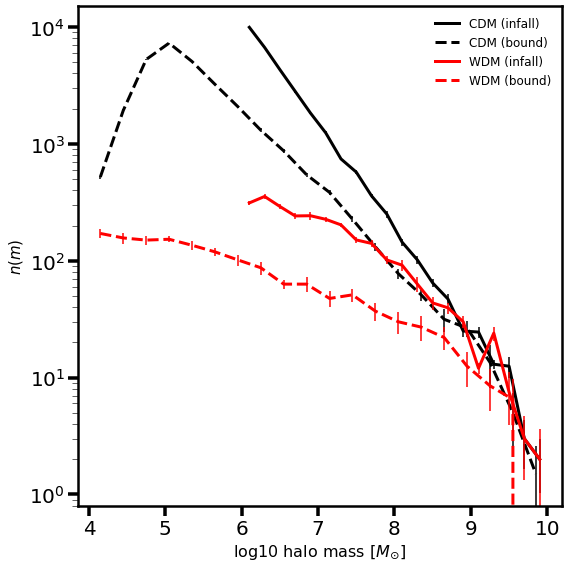

In [15]:
fig = plt.figure(1)
fig.set_size_inches(8,8)
ax = plt.subplot(111)
kwargs_plot={'lw':3, 'label': 'CDM (infall)'}
plot_subhalo_mass_functon(cdm, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='k')
kwargs_plot={'linestyle': '--', 'lw':3, 'label': 'CDM (bound)'}
plot_subhalo_mass_functon(cdm, log_m_low=4.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='k')

kwargs_plot={'lw':3, 'label':'WDM (infall)'}
plot_subhalo_mass_functon(wdm, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='r')
kwargs_plot={'linestyle': '--','lw':3, 'label':'WDM (bound)'}
plot_subhalo_mass_functon(wdm, log_m_low=4.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='r')

ax.set_ylim(0.8, 15000)
ax.set_xlabel('log10 halo mass '+r'$\left[M_{\odot}\right]$', fontsize=16)
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
plt.savefig('infall_vs_bound.pdf')

### Subhalo mass loss

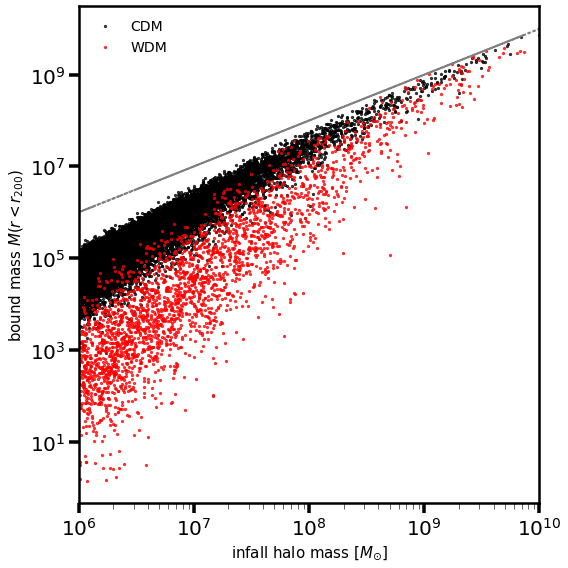

In [16]:
fig = plt.figure(1)
fig.set_size_inches(8,8)
ax = plt.subplot(111)
kwargs_plot={'alpha': 0.75, 's': 5, 'label': 'CDM'}
plot_subhalo_bound_mass(cdm, ax=ax, kwargs_plot=kwargs_plot, color='k')
kwargs_plot={'alpha': 0.75,'s': 5, 'label': 'WDM'}
plot_subhalo_bound_mass(wdm, ax=ax, kwargs_plot=kwargs_plot, color='r')
ax.legend(fontsize=14, frameon=False)
ax.set_ylabel('bound mass '+r'$M\left(r<r_{200}\right)$')
plt.tight_layout()
plt.savefig('mass_loss.pdf')

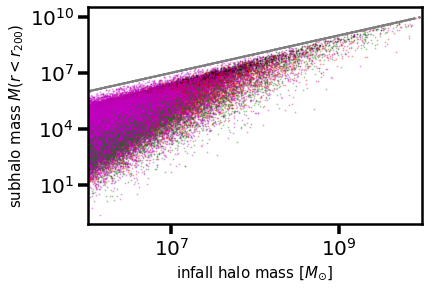

In [17]:
fig = plt.figure(1)

ax = plt.subplot(111)
kwargs_plot={'alpha': 0.25, 's': 1}
plot_subhalo_bound_mass(cdm, ax=ax, kwargs_plot=kwargs_plot, color='k')
kwargs_plot={'alpha': 0.25,'s': 1}
plot_subhalo_bound_mass(cdm_truncation_v2, ax=ax, kwargs_plot=kwargs_plot, color='r')
kwargs_plot={'alpha': 0.25,'s': 1}
plot_subhalo_bound_mass(cdm_truncation_v3, ax=ax, kwargs_plot=kwargs_plot, color='m')
kwargs_plot={'alpha': 0.25,'s': 1}
plot_subhalo_bound_mass(wdm, ax=ax, kwargs_plot=kwargs_plot, color='g')



### Subhalo mass function between CDM and WDM

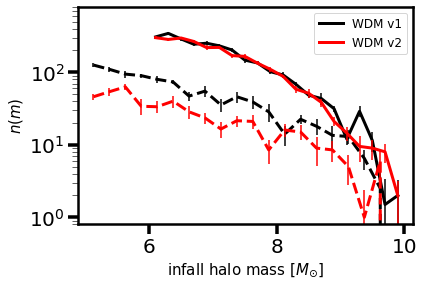

In [18]:
fig = plt.figure(1)
ax = plt.subplot(111)

kwargs_plot={'lw':3, 'label':'WDM v1'}
plot_subhalo_mass_functon(wdm, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='k')
kwargs_plot={'linestyle': '--','lw':3}
plot_subhalo_mass_functon(wdm, log_m_low=5.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='k')

kwargs_plot={'lw':3, 'label':'WDM v2'}
plot_subhalo_mass_functon(wdm_v2, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='r')
kwargs_plot={'linestyle': '--','lw':3}
plot_subhalo_mass_functon(wdm_v2, log_m_low=5.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='r')

ax.set_ylim(0.8, 800)
ax.legend(fontsize=12)

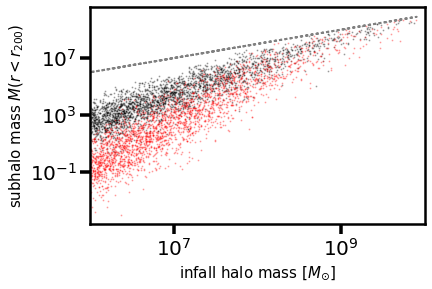

In [19]:
fig = plt.figure(1)

ax = plt.subplot(111)
kwargs_plot={'alpha': 0.25, 's': 1}
plot_subhalo_bound_mass(wdm, ax=ax, kwargs_plot=kwargs_plot, color='k')
kwargs_plot={'alpha': 0.25, 's': 1}
plot_subhalo_bound_mass(wdm_v2, ax=ax, kwargs_plot=kwargs_plot, color='r')


### Concentration-mass relation 

In [20]:
kwargs_truncation_model_subhalos = {'median_rt_over_rs':5.0, 'c_power': 3.0}
wdm_v3 = WDM(0.5, 1.5, log_mc=6.5, sigma_sub=5*sigma_sub, LOS_normalization=0.0, 
                       truncation_model_subhalos='TRUNCATION_MEAN_DENSITY',
                       kwargs_truncation_model_subhalos=kwargs_truncation_model_subhalos)

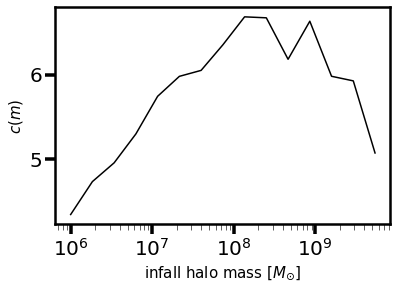

In [21]:
plot_concentration_mass_relation(wdm_v3, 'z_lens',nbins=15)